**Seaborn 라이브러리**는 Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급 버전이다. 이번에는 Seaborn 라이브러리의 사용법을 알아보자..

<h3> 데이터셋 가져오기 <h3>

Seaborn 라이브러리에서 제공하는 **'titanic' 데이터셋**을 가져와보자. <br>
**load_dataset() 함수**를 사용하면 데이터프레임으로 가져올 수 있다.

In [ ]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   cla

<h3> 회귀선이 있는 산점도 </h3>

**regplot() 함수**는 서로 다른 2개의 연속 변수 사이의 산점도를 그리고 선형회귀분석에 의한 회귀선을 함께 나타낸다. <br>
**fit_reg 매개변수**를 False로 설정하면 회귀선을 안 보이게 할 수 있다.

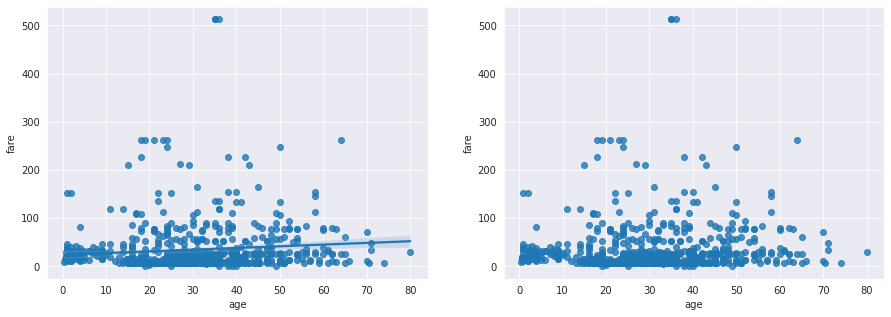

In [ ]:
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 선형회귀선 표시
sns.regplot(x = 'age', # x축 변수
            y = 'fare', # y축 변수
            data = titanic, # 데이터
            ax = ax1 # axe 객체
            ) 

# 선형회귀선 미표시
sns.regplot(x = 'age', # x축 변수
            y = 'fare', # y축 변수
            data= titanic, # 데이터
            ax = ax2, # axe 객체
            fit_reg = False) # 회귀선 미표시

plt.show()

<h3> 히스토그램/커널 밀도 그래프 </h3>

단변수(하나의 변수) 데이터의 분포를 확인할 때 **distplot() 함수**를 사용한다. 기본값으로 히스토그램과 커널 밀도 함수를 출력한다.

* 커널 밀도 함수는 그래프와 x축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수이다.

**hist 매개변수**를 False로 지정하면 히스토그램이 출력되지 않는다. <br>
**kde 매개변수**를 False로 지정하면 커널 밀도 그래프를 표시하지 않는다. <br>
밀도 그래프는 **kdeplot() 함수**, 히스토그램은 **histplot() 함수**를 이용해 그릴 수 있다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


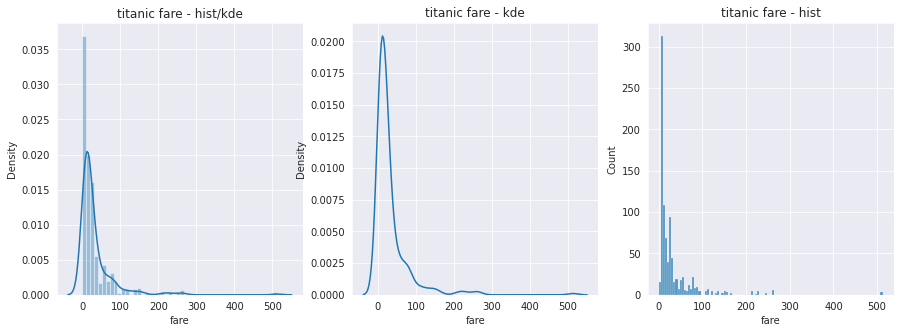

In [ ]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# distplot
sns.distplot(titanic['fare'], ax= ax1)

# kdeplot (Kernel Density Estimation)
sns.kdeplot(x = 'fare', data = titanic, ax = ax2)

# histplot
sns.histplot(x = 'fare', data = titanic, ax = ax3)

ax1.set_title('titanic fare - hist/kde')
ax2.set_title('titanic fare - kde')
ax3.set_title('titanic fare - hist')

plt.show()

<h3> 히트맵 </h3>

히트맵(heatmap)을 그리려면 **heatmap() 메소드**를 사용하면 된다. <br>
먼저 두 개의 범주형 변수를 각각 x, y 축에 놓고 데이터를 매트릭스 형태로 분류한다. 아래와 같이 피벗 테이블을 이용하면 쉽게 분류할 수 있다. pivot_table() 메소드는 6장에서 알아보도록하자.


In [ ]:
# 피벗 테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리한다.
table = titanic.pivot_table(index = 'sex', columns = 'class', aggfunc = 'size')
print()
print(table)

<bound method DataFrame.info of      survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0           0       3    male  22.0  ...   NaN  Southampton     no  False
1           1       1  female  38.0  ...     C    Cherbourg    yes  False
2           1       3  female  26.0  ...   NaN  Southampton    yes   True
3           1       1  female  35.0  ...     C  Southampton    yes  False
4           0       3    male  35.0  ...   NaN  Southampton     no   True
..        ...     ...     ...   ...  ...   ...          ...    ...    ...
886         0       2    male  27.0  ...   NaN  Southampton     no   True
887         1       1  female  19.0  ...     B  Southampton    yes   True
888         0       3  female   NaN  ...   NaN  Southampton     no  False
889         1       1    male  26.0  ...     C    Cherbourg    yes   True
890         0       3    male  32.0  ...   NaN   Queenstown     no   True

[891 rows x 15 columns]>
class   First  Second  Third
sex                      

cbar 매개변수를 False로 지정하면 컬러바가 표시되지 않는다.

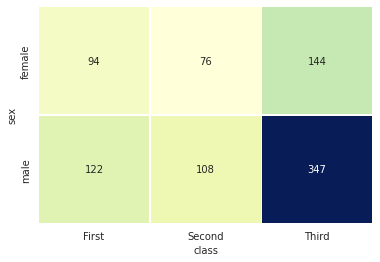

In [ ]:
sns.heatmap(table, 
            annot = True, fmt = 'd', # 데이터 값 표시 여부, 정수형 포맷
            cmap = 'YlGnBu', # 컬러 맵
            linewidth = .5,
            cbar = False)

plt.show()

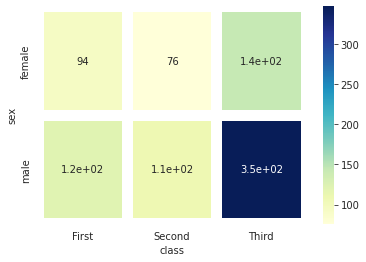

In [ ]:
sns.heatmap(table, 
            annot = True, # 데이터 값 표시 여부, 정수형 포맷
            cmap = 'YlGnBu', # 컬러 맵
            linewidth = 10,
            cbar = True)

plt.show()

<h3> 범주형 데이터의 산점도 </h3>

범주형 변수에 들어있는 각 범주별 데이터의 분포를 확인할 수 있다. **stripplot() 함수**와 **swarmplot() 함수**를 이용해 그릴 수 있다. swarmplot() 함수는 데이터의 분산까지 고려해 데이터 포인트가 서로 중복되지 않도록 그린다. <br>
**hue 매개변수**에 세 번째 열을 입력해주면 데이터 값에 따라 색상을 구별해 출력한다.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


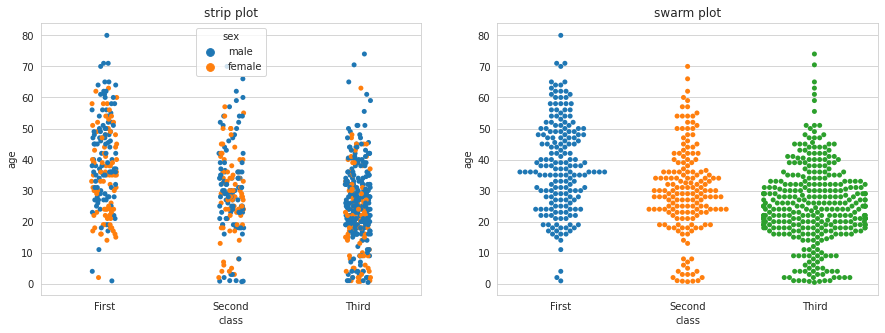

In [ ]:
sns.set_style('whitegrid')

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.stripplot(x = 'class',
              y = 'age',
              data = titanic,
              ax = ax1,
              hue = 'sex')

sns.swarmplot(x = 'class',
              y = 'age',
              data = titanic,
              ax = ax2)

ax1.set_title('strip plot')
ax2.set_title('swarm plot')

plt.show()

<h3> 막대그래프 </h3>

**barplot() 함수**를 이용해 막대 그래프를 그릴 수 있다. <br>
**dodge 매개변수**를 False로 지정하면 값을 누적해 출력할 수 있다. <br>
**hue 매개변수**는 이전 범주형 산점도와 동일하다. <br>
3개의 axe객체를 만드로 옵션을 바꿔가며 그래프를 그려보자.

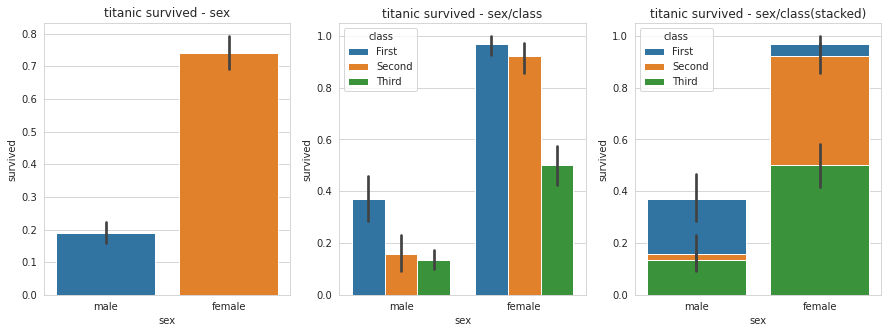

In [ ]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax1)
sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax2, hue = 'class')
sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax3, hue = 'class', dodge = False)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

<h3> 빈도 그래프 </h3>

**countplot() 함수**를 사용하면 각 범주에 속하는 데이터의 개수를 막대 그래프로 나타낼 수 있다. <br>
이전과 동일하게 **hue 매개변수**와 **dodge 매개변수**를 변경해보자. <br>
**palette 매개변수**를 이용해 그래프 색 구성을 다르게 할 수 있다.

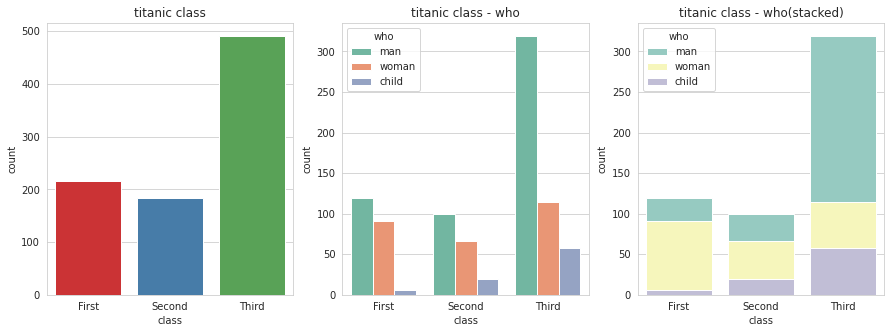

In [ ]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.countplot(x = 'class', palette = 'Set1', data = titanic, ax = ax1)
sns.countplot(x = 'class', palette = 'Set2', data = titanic, ax = ax2, hue = 'who')
sns.countplot(x = 'class', palette = 'Set3', data = titanic, ax = ax3, hue = 'who', dodge = False)

ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

<h3> 박스 플롯/바이올린 그래프 </h3>

박스 플롯은 범주형 데이터 분포와 주요 통계 지표를 함께 제공한다. <br> 하지만 박스 플롯만으로는 데이터가 퍼져있는 분산의 정도를 알기 어렵다. 따라서 커널 밀도 함수 그래프를 y축 방향에 추가해 바이올린 그래프를 그리는 경우도 있다. <br> 박스 플롯은 **boxplot() 함수**, 바이올린 그래프는 **violinplot() 함수**로 그린다. <br> **hue 매개변수**를 추가하면 데이터 값에 따라 구분해서 박스 플롯을 그린다.

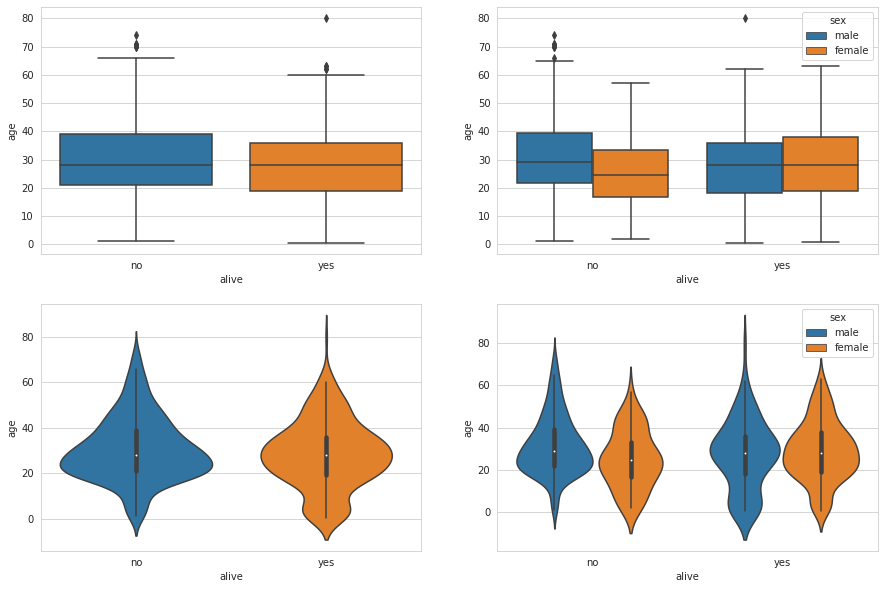

In [ ]:
fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.boxplot(x = 'alive', y = 'age', data = titanic, ax = ax1)
sns.boxplot(x = 'alive', y = 'age', data = titanic, ax = ax2, hue = 'sex')

sns.violinplot(x = 'alive', y = 'age', data = titanic, ax = ax3)
sns.violinplot(x = 'alive', y = 'age', data = titanic, ax = ax4, hue = 'sex')

plt.show()

<h3> 조인트 그래프 </h3>

**jointplot() 함수**는 산점도를 기본으로 표시하고 x-y 축에 각 변수에 대한 히스토그램을 동시에 보여준다. <br>
회귀선을 추가하려면 **kind 매개변수**를 'reg'로 지정하면 된다. <br>
육간 산점도는 'hex', 커널 그래프는 'kde'로 지정해야한다.

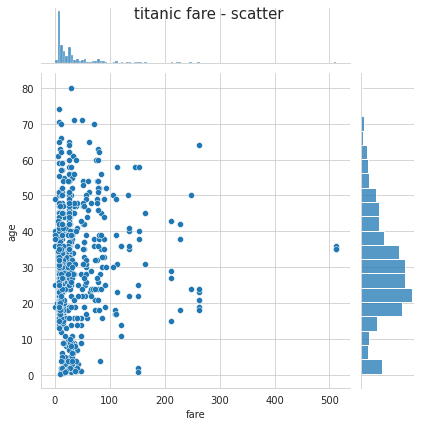

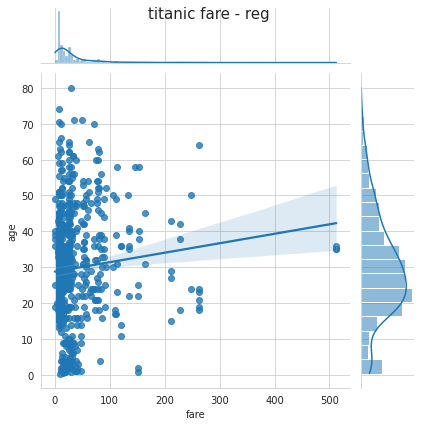

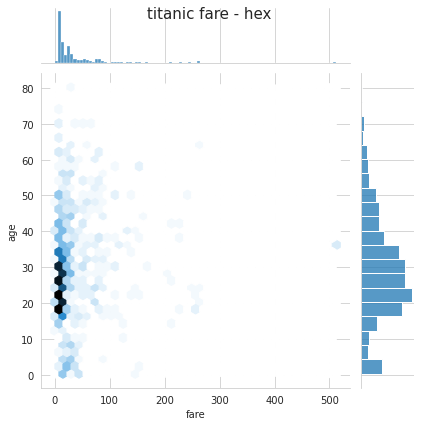

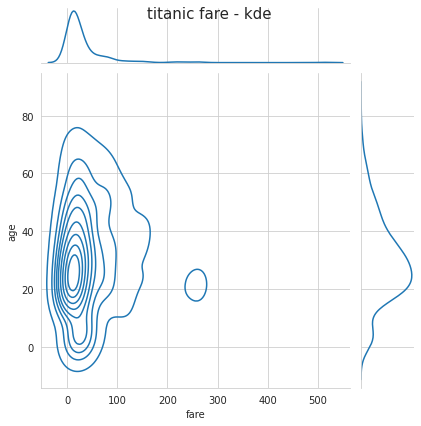

In [ ]:
sns.set_style('whitegrid')

# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x = 'fare', y = 'age', data = titanic)

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x = 'fare', y = 'age', kind = 'reg', data = titanic)

# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x = 'fare', y = 'age', kind = 'hex', data = titanic)

# 조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(x = 'fare', y = 'age', kind = 'kde', data = titanic)

j1.fig.suptitle('titanic fare - scatter', size = 15)
j2.fig.suptitle('titanic fare - reg', size = 15)
j3.fig.suptitle('titanic fare - hex', size = 15)
j4.fig.suptitle('titanic fare - kde', size = 15)

plt.show()

<h3> 조건을 적용해 화면을 그리드로 분할하기 </h3>

**FacetGride() 함수**는 행, 열 방향으로 서로 다른 조건을 적용해 여러 개의 서브 플롯을 만든다. 그리고 각 서브 플롯에 적용할 그래프 종류를 **map() 메소드**를 이용해 그리드 객체에 전달한다. <br>
열 방향은 'who' 열의 탑승객 구분 (man, woman, child) 값으로 구분하고, 행 방향으로는 'survived' 열의 구조 여부(구조 = 1, 구조 실패 = 0) 값으로 구분하는 2 * 3 모양의 그리드를 만들어보자. 그리고 'age' 열의 나이를 기준으로 히스토그램을 그려보자.

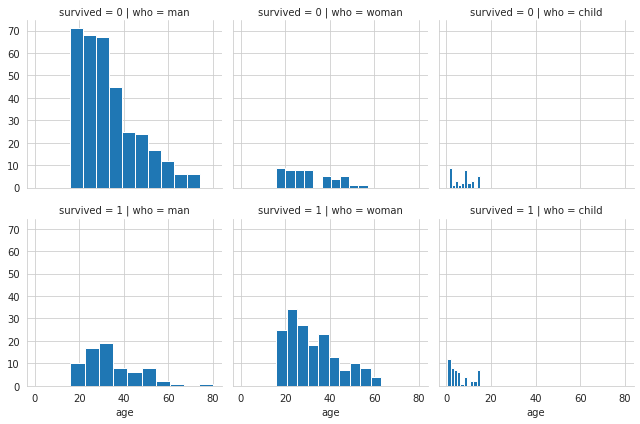

In [ ]:
g = sns.FacetGrid(data = titanic, col = 'who', row = 'survived')

g = g.map(plt.hist, 'age')

<h3> 이변수 데이터의 분포 </h3>

**pairplot() 함수**는 인자로 전달되는 데이터프레임의 열을 두 개씩 짝을 지을 수 있는 모든 조합에 대해 표현한다. 그래프를 그리기 위해 만들어진 짝의 개수만큼 화면을 그리드로 나눈다. 같은 변수끼리 짝을 이루는 대각선 방향으로는 히스토그램을 그리고, 서로 다른 변수 간에는 산점도를 그린다.

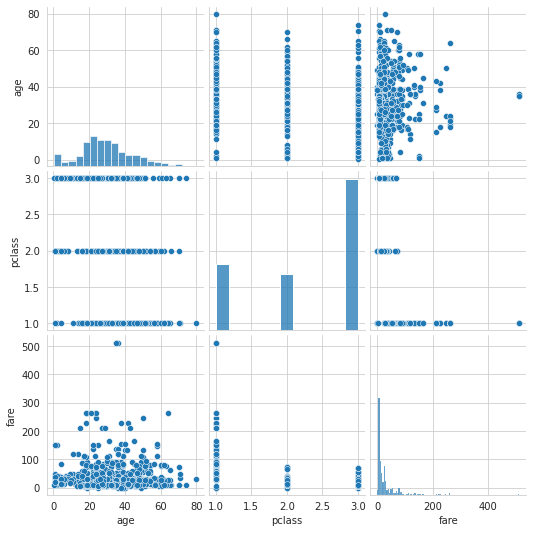

In [ ]:
titanic_pair = titanic[['age', 'pclass', 'fare']]

g = sns.pairplot(titanic_pair)